In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy.optimize import curve_fit


In [2]:
raw_data=np.loadtxt('group-5.asc')
print(np.shape(raw_data))

(1024, 1360)


In [3]:
raw_data

array([[64., 67., 70., ..., 75., 76., 75.],
       [64., 63., 61., ..., 68., 70., 67.],
       [61., 67., 68., ..., 78., 74., 72.],
       ...,
       [64., 61., 67., ..., 75., 78., 76.],
       [64., 71., 69., ..., 82., 72., 80.],
       [72., 62., 72., ..., 75., 83., 79.]])

In [4]:
M, N = raw_data.shape
MK = M // 2
NL = N // 2
data=raw_data[:M, :N]. reshape(MK, 2, NL, 2).mean(axis=(1, 3))
print(data)

[[64.5  63.5  67.75 ... 74.25 73.   72.  ]
 [64.   65.75 66.75 ... 75.25 73.25 71.5 ]
 [67.25 67.75 69.5  ... 72.   74.   72.25]
 ...
 [67.25 69.5  66.5  ... 75.25 80.   82.  ]
 [64.25 70.   66.75 ... 77.75 80.25 77.25]
 [67.25 70.25 70.75 ... 82.75 77.5  78.5 ]]


In [5]:
print(data.shape)

(512, 680)


In [6]:
Y_1=data.sum(axis=0)
Y_2= data.sum(axis=1)
X_1= range(len(Y_1))
X_2= range(len(Y_2))
print(type(Y_1))

<class 'numpy.ndarray'>


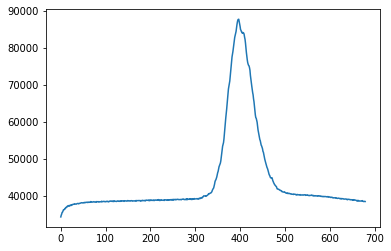

In [7]:
plt.plot(X_1, Y_1)

# """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""'

In [8]:
from scipy.optimize import curve_fit
def gauss(x,*p):
    a, x0, sigma, d = p
    y= a*np.exp(- np.power(  ( x- x0 ), 2. ) / (2. * sigma**2. )) + d
    return y

In [9]:
mu1= sum(X_1 * Y_1) / sum(Y_1)
mu2= sum(X_2 * Y_2 ) / sum(Y_2 )

sigma1 = np.sqrt( sum(Y_1 * (X_1 - mu1)**2) / sum(Y_1))
sigma2 = np.sqrt( sum(Y_2 * (X_2 - mu2)**2) / sum(Y_2))


In [10]:
# fit with gaussian
popt1 , pcov1= curve_fit( gauss, X_1, Y_1, p0 =[ 1.0 , mu1, sigma1, 0.0 ])
popt2 , pcov2= curve_fit( gauss, X_2, Y_2, p0 =[ 1.0 , mu2, sigma2, 0.0 ])
y1_fit=gauss( X_1, *popt1 )
y2_fit=gauss( X_2 , *popt2 )


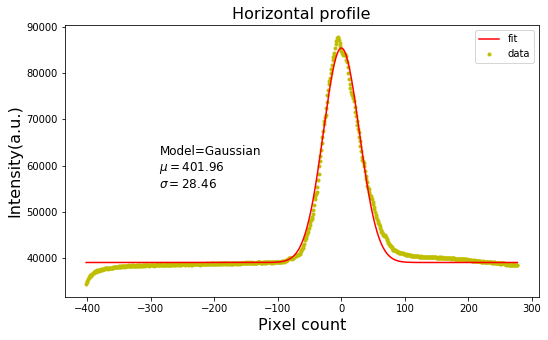

In [78]:
sigma1_new=popt1[2]
mean1_new=popt1[1]
xnew1=X_1-mean1_new
textstr1 = '\n'.join((
    r'Model=Gaussian',
    r'$\mu=%.2f$' % (popt1[1]),
    r'$\sigma=%.2f$' % (popt1[2])))
f1 = plt.figure(figsize=(8.5,5))
ax1 = f1.add_subplot(111)
plt.scatter( xnew1, Y_1, marker='.' ,c='y', label = 'data')
plt.plot( xnew1, y1_fit, '-r', label = 'fit')
plt.xlabel('Pixel count',fontsize=16)
plt.ylabel('Intensity(a.u.)',fontsize=16)
plt.title('Horizontal profile',fontsize=16)
plt.text(0.2,0.4, textstr1,fontsize=12, transform = ax1.transAxes)
plt.legend()
plt.savefig('labPlot1.png',dpi=200)

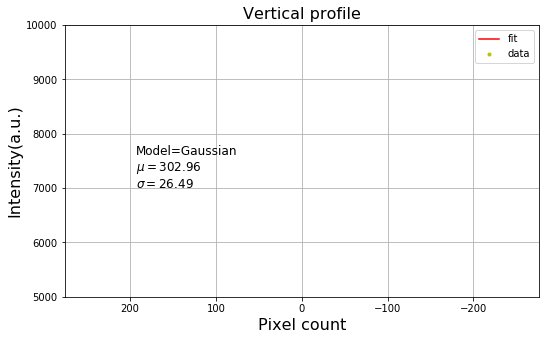

In [93]:
sigma2_new=popt2[2]
mean2_new=popt2[1]
xnew2=X_2-popt2[1]
textstr2 = '\n'.join((
    r'Model=Gaussian',
    r'$\mu=%.2f$' % (popt2[1] ),
    r'$\sigma=%.2f$' % (popt2[2] )))

f2 = plt.figure(figsize=(8.5,5))
ax2 = f2.add_subplot(111)
plt.xlim(right=sigma2_new-mean2_new) #xmax is your value
plt.xlim(left=-(sigma2_new-mean2_new)) #xmin is your value
plt.ylim(top=10000) #ymax is your value
plt.ylim(bottom=5000) #ymin is your value
plt.scatter( xnew2, Y_2 ,marker='.',c='y', label = 'data')
plt.plot( xnew2, y2_fit, '-r', label = 'fit')

plt.xlabel('Pixel count',fontsize=16)
plt.ylabel('Intensity(a.u.)',fontsize=16)
plt.title('Vertical profile',fontsize=16)
plt.text(0.15,0.4, textstr2, fontsize=12,transform = ax2.transAxes)
plt.legend(loc='best')
plt.grid(True)
plt.savefig('labPlot2.png',dpi=200)

In [29]:

print('The standard deviation of first plot=% 0.4f' % popt1[2] ,'\nMaximum value of intensity=% 0.2f' %(max(y1_fit)))

The standard deviation of first plot= 28.4625 
Maximum value of intensity= 85400.05


In [14]:
print('The standard deviation of second plotp=', popt2[2] )

The standard deviation of second plotp= 26.490071702678627
